# DataSci 2 LR Project @Ryan Bookman, @Rohit Singh

# Load the data

Dataset of car prices with a bunch of features that can predict it. Dataset contains ~250 rows, so it's small, but it should be okay for the scope of this project (I've noticed LR doesn't need a TON of data, compared to some other models)

In [1]:


df_1 = _deepnote_execute_sql("""SELECT *
FROM 'CarPrice_Assignment.csv'
""", 'SQL_DEEPNOTE_DATAFRAME_SQL')
df_1

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [2]:
import pandas as pd
df=pd.read_csv('CarPrice_Assignment.csv')
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


We notice this method only describes numerical data (seems obvious why, based on the metrics it uses). All columns have 205 as count, which equals num rows, so there don't seem to be any missing values (LETS GOO haha)

# Preprocess Data

We don't need to do a whole lot here, just drop cat data

In [3]:
#get the names of all the columns that are categorical (strings)
obj_columns = []
for i in range(len(df.columns)):
    test_list = df.iloc[:,i]
    if isinstance(test_list[0], str):
        obj_columns.append(df.columns[i])
print(obj_columns)

#drop all categorical columns because we're lazy and they're annoying
df=df.drop(axis=1, labels=obj_columns)
#also drop car_ID since it won't be a predictor of anything and we don't want model to pick up bad pattern
df=df.drop(axis=1, labels='car_ID')
print('categorical columns successfully dropped from df')

['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem']
categorical columns successfully dropped from df


In [4]:
#now let's get some info about what the dataset is like after that cat data was dropped
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   wheelbase         205 non-null    float64
 2   carlength         205 non-null    float64
 3   carwidth          205 non-null    float64
 4   carheight         205 non-null    float64
 5   curbweight        205 non-null    int64  
 6   enginesize        205 non-null    int64  
 7   boreratio         205 non-null    float64
 8   stroke            205 non-null    float64
 9   compressionratio  205 non-null    float64
 10  horsepower        205 non-null    int64  
 11  peakrpm           205 non-null    int64  
 12  citympg           205 non-null    int64  
 13  highwaympg        205 non-null    int64  
 14  price             205 non-null    float64
dtypes: float64(8), int64(7)
memory usage: 24.1 KB


All are numerical data, all have 205 non-NaN values :)

# Set up LSRL LR Model

In [5]:
#X (independent features) consists of everything but the price
X=[]
for i in df:
    if i!='price':
        X.append(i)
#dependent, y, is price
y='price'

In [6]:
#train test split with 80/20 train/test ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[X],df[y], random_state=1, 
    shuffle=True, train_size=.8)

In [21]:
#generate a LR model from sklearn and fit it to the train data
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False).fit(X_train, y_train)

In the LR model above, the reason I know to put fit_intercept=False is because of the CV hyperparam tuning below (and tests confirm results). See the CV section for more info on this.

I worry, though, that setting fit_intercept to false may make the model a bit overfit. I'd have to test this on more data to really see.

In [22]:
#print key metrics from that model
print('r^2: ',model.score(X_test,y_test))
print('intercept (B0): ',model.intercept_)
print('coef: ',model.coef_)

r^2:  0.7914166975879484
intercept (B0):  0.0
coef:  [ 1.58444453e+02  2.18675772e+02 -1.59075129e+02  1.15485095e+02
  7.42680858e+01  1.89231121e+00  1.20463373e+02 -2.42985761e+03
 -3.37889454e+03  4.00697147e+02  2.61590455e+01  1.26838588e+00
 -4.49129597e+02  1.48069954e+02]


Model is pretty accurate!

Some more metrics below, just for fun :)

In [9]:
#get metric for RMSE (root mean square error). 
#I like RMSE over MAE because I prefer to overestimate error than understimate
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

mse = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))
rmse = math.sqrt(mse)
print('rmse:',rmse)

#calculate MAE too, just for fun:
mae = mean_absolute_error(y_true=y_test, y_pred=model.predict(X_test))
print('mae:',mae)

rmse: 3385.522480854368
mae: 2316.0769770738207


# Optimizing Model with CV Grid Search

Just some context: we're using k folds CV: splitting data into k groups, using k-1 for training, using 1 for testing, repeat k times and average results

Grid Search assumes each k group is randomly selected from dataset (and therefore assumes each group is a a "microcosm" of the dataset and therefore a good predictor). It switches model hyperparams at each group and compares results to find optimal settings.

The top section of this code block is doing basic CV on the data with sklearn cross_val_score. No optimization happening, just CV which is cool.

The next section (in multi-line comment) does CV Grid Search with Ridge model which is an iteration on basic LR that adds l2 regularization, which in low-level terms (from my basic understanding) means that it reduces some bias by shrinking the importance of some features that may be irrelevant to ~0

The next section uses the LSRL model we've been using. For simplicity of this assignment, I'm just going to use this one, not Ridge, even through Ridge results seem a bit less biased

In [10]:
#instead of train/test split, do this with cross validation (CV)

from sklearn.model_selection import cross_val_score, cross_validate, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# #in k-folds CV, split data into k groups, use k-1 to train with and use 1 to test. Repeat k times.
# folds = KFold(n_splits = 6, shuffle = True, random_state = 1) 

# cv_score = cross_val_score(model, df[X], df[y], cv=folds, scoring='r2')
# data = cross_validate(LinearRegression(), X=X_train, y=y_train, scoring='r2') #not quite sure difference between cross_val_score and cross_validate
# print(cv_score)
# print(model.get_params())

'''
#I tried this first with a Ridge model since there are more tunable params

#dictionary of params to test for Ridge model since there are more tunable hyperparams
params = {
    'alpha' : [0, 25, 50, 100, 500, 750, 850, 1000],
    'fit_intercept': [True, False],
    'solver' : ['auto', 'svd', 'lsqr', 'sag']
}

test_model=Ridge()
grid_kn = GridSearchCV(estimator = test_model,param_grid = params, scoring = 'r2', cv = 15)
grid_kn.fit(df[X], df[y])
print(grid_kn.best_estimator_)
'''

#Do the same thing with the LR (LSRL) model we've been using
#dictionary of params to test: 
params = {
    'fit_intercept' : [True, False],
    'copy_X': [True, False],
    'positive' : [True, False]
}

grid_kn = GridSearchCV(estimator = LinearRegression(),param_grid = params, scoring = 'r2', cv = 15)
grid_kn.fit(df[X], df[y])
print(grid_kn.best_estimator_)

LinearRegression(fit_intercept=False)


Seems all params should stay at default, except for fit_intercept, which should be false. I made this change on the model above, and  tested to confirm changes (in a small magnitude) increase model accuracy

One question I still have after doing this is how to optimally set cv=#. Does this test each variable with every other variable in every param other than its own? If so, CV should be higher, but then there'd be a lot of potential bias since the test size would be so minuscule and these results would be so inaccurate (given data set only has 205 rows). But if cv is not big enough, I wonder if it doesn't even test the params that it doesn't get to...

# Plot Results

true prices (x) vs. predicted prices (y). No real set up here is needed.

[Text(0.5, 1.0, 'true prices (x) vs. predicted prices (y)'),
 Text(0.5, 0, 'true prices'),
 Text(0, 0.5, 'predicted prices')]

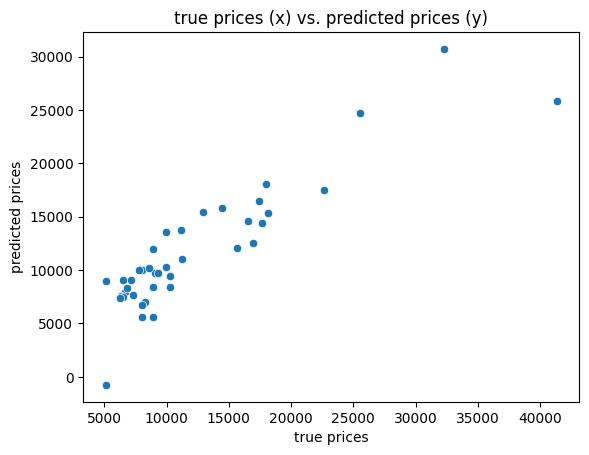

In [11]:
#plot true values (x), predictions (y)
import seaborn as sns

sns.scatterplot(x=y_test, y=model.predict(X_test)).set(
    title='true prices (x) vs. predicted prices (y)', xlabel='true prices', ylabel='predicted prices')


Plotting actual price (x), |percent residual| (y). Must get these values with some code first.

In [12]:
y_pred=model.predict(X_test)
y_actual = y_test

x = 0
percent_dif=[]
while x<len(y_pred):
    print('y_pred: ', y_pred[x], ' y_actual: ', y_actual.iloc[x])
    percent_dif.append((abs(y_pred[x]-y_actual.iloc[x])/y_actual.iloc[x]))
    x+=1


y_pred:  7963.796709716722  y_actual:  6669.0
y_pred:  5581.684903738551  y_actual:  7999.0
y_pred:  7546.812718164481  y_actual:  6338.0
y_pred:  5574.541891527953  y_actual:  8916.5
y_pred:  8397.595252812655  y_actual:  10295.0
y_pred:  24712.329715023174  y_actual:  25552.0
y_pred:  7042.390185598249  y_actual:  8249.0
y_pred:  -758.1298424762244  y_actual:  5151.0
y_pred:  7499.504937803358  y_actual:  6488.0
y_pred:  9481.054173227436  y_actual:  10245.0
y_pred:  16512.174594591914  y_actual:  17450.0
y_pred:  14424.814058316075  y_actual:  17669.0
y_pred:  14565.32047984506  y_actual:  16515.0
y_pred:  9749.622231692465  y_actual:  9095.0
y_pred:  15425.931739812651  y_actual:  12964.0
y_pred:  13790.421853027994  y_actual:  11199.0
y_pred:  10334.994797175288  y_actual:  9980.0
y_pred:  9090.747393349591  y_actual:  6529.0
y_pred:  15307.857958913704  y_actual:  18150.0
y_pred:  11071.681904613612  y_actual:  11259.0
y_pred:  8380.908888357406  y_actual:  8948.0
y_pred:  8324.5

Making a histogram of it, plotting frequency

[Text(0.5, 1.0, 'frequency plot of percent difference between y_pred and y_actual')]

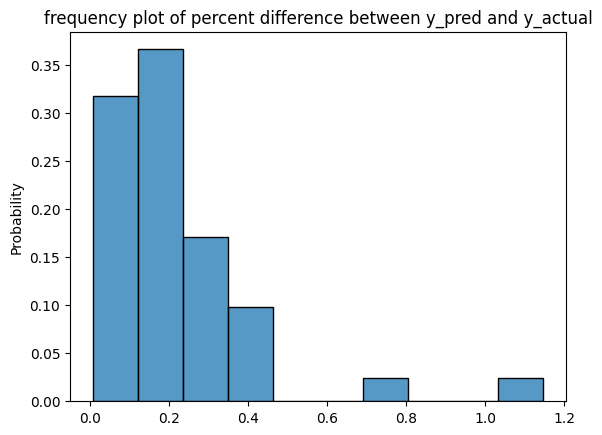

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.histplot(x=percent_dif, stat='probability').set(title='frequency plot of percent difference between y_pred and y_actual')

Visualizing percent resid as scatter, as described above

[Text(0.5, 1.0, 'percent difference (absolute value)'),
 Text(0.5, 0, 'actual price'),
 Text(0, 0.5, 'percent difference between predicted and actual price')]

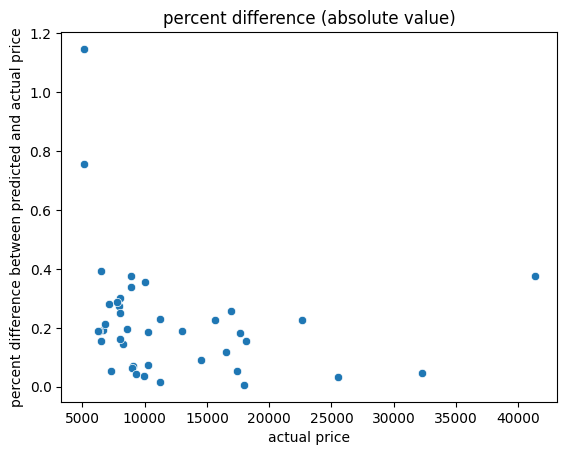

In [14]:
#scatterplot the percent change
#this is like a "percent residuals" (but absolute value) if that's a thing haha
sns.scatterplot(x=y_test, y=percent_dif).set(title='percent difference (absolute value)', 
    xlabel='actual price', ylabel = 'percent difference between predicted and actual price')

Box and whisker is cool to see Q1/Q2/Q3/Q4 of |percent resid|

[Text(0.5, 1.0, 'box and whisker plot of percent difference between price predicted and actual price')]

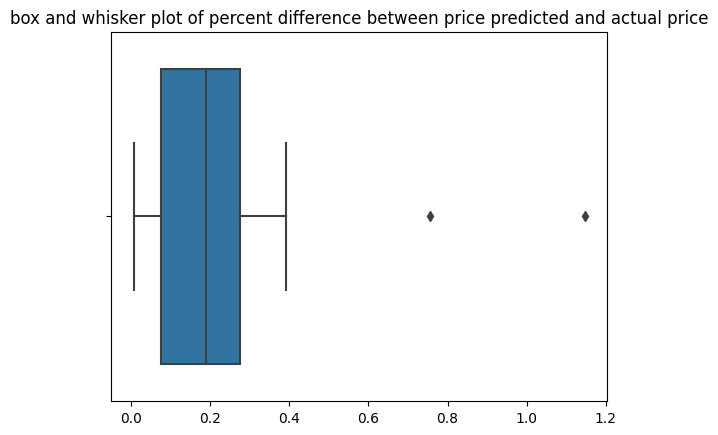

In [15]:
sns.boxplot(x=percent_dif).set(title='box and whisker plot of percent difference between price predicted and actual price')

Median error is around ~15% (I could get this number exactly, but that's too much work lol). This is honestly super impressive for LRSL LR with such a small dataset.

Plotting residuals now. Must calculate them first.

In [16]:
residuals = y_actual-y_pred
print(residuals)

78     -1294.796710
97      2417.315096
151    -1208.812718
44      3341.958108
40      1897.404747
67       839.670285
98      1206.609814
18      5909.129842
152    -1011.504938
62       763.945827
4        937.825405
172     3244.185942
197     1949.679520
38      -654.622232
29     -2461.931740
170    -2591.421853
190     -354.994797
33     -2561.747393
136     2842.142041
145      187.318095
173      567.091112
31     -1469.549060
11      4337.695651
119    -2177.573673
169    -3559.206018
34     -1992.024373
84     -1314.001887
184    -2011.854662
120    -1181.265322
35      -391.559519
163     1317.304765
28     -3036.494290
16     15471.590989
130     -392.737851
116     -110.247575
182    -2226.177728
27     -1680.935663
47      1517.744708
58      3536.499282
204     5122.962978
138    -3867.621850
Name: price, dtype: float64


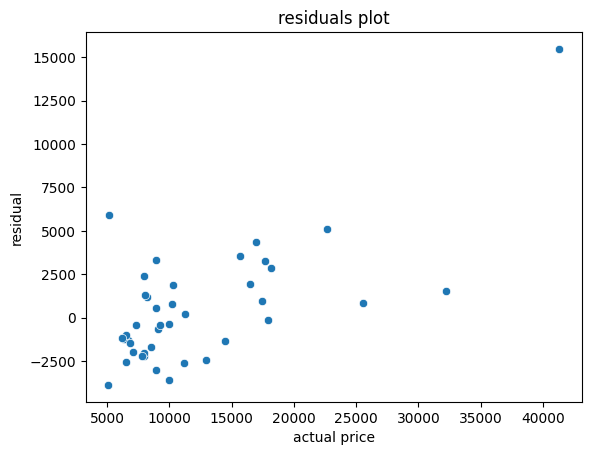

"\nBased on the plot, the resids seem randomly scattered above/below 0 unil ~x=$20,000, \nwhere it seems like residuals mostly become positive, but it may be because this data contains\nextreme outlier cars with high prices. So LR seems to be be a great method until ~x=$20,000, then \nit gets a but worse but it's still pretty good even then.\n"

In [17]:
sns.scatterplot(x=y_test, y=residuals).set(title='residuals plot', xlabel='actual price', ylabel='residual')
plt.title('residuals plot')
plt.show()

'''
Based on the plot, the resids seem randomly scattered above/below 0 unil ~x=$20,000, 
where it seems like residuals mostly become positive, but it may be because this data contains
extreme outlier cars with high prices. So LR seems to be be a great method until ~x=$20,000, then 
it gets a but worse but it's still pretty good even then.
'''

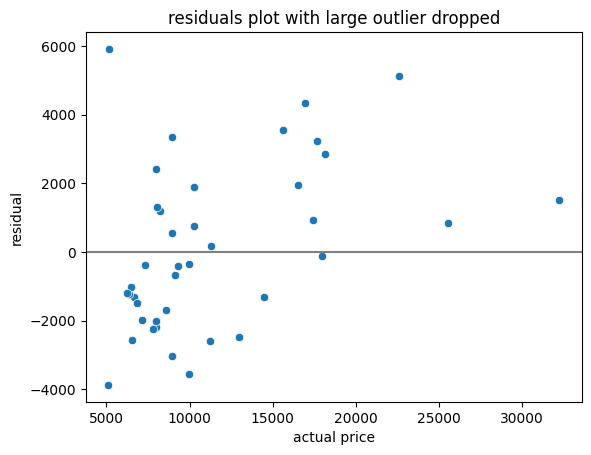

In [18]:
#drop that one outlier to visualize residuals a bit better
drop_outlier_resids = []
y_test_drop_outlier_resid = []
for i in range(len(residuals)):
    # print(residuals.iloc[i])
    if residuals.iloc[i] <10000:
        drop_outlier_resids.append(residuals.iloc[i])
        y_test_drop_outlier_resid.append(y_test.iloc[i])
        # break

graph = sns.scatterplot(x=y_test_drop_outlier_resid, y=drop_outlier_resids).axhline(y=0, color='grey')
# graph.set(title=
#     'residuals plot with large outlier dropped', xlabel='actual price', ylabel='residual')

#throws an error with the .set since I already used .xhline (annoying), so just using plt which
    #sns is built on top of to make title/xlabel/ylabel
plt.title('residuals plot with large outlier dropped')
plt.xlabel('actual price')
plt.ylabel('residual')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0402a6a1-9102-4edb-b4a6-c0aebc9169d5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>